In [1]:
import pandas as pd

# Load the data from the Excel file
df = pd.read_excel('BIA_Dataset.xlsx')


In [2]:
# Display column names, data types, and non-null values
print(df.info())

# Display the first few rows of the dataset
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4938 entries, 0 to 4937
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SystemID            4938 non-null   int64         
 1   Project Reference   4938 non-null   object        
 2   Project Title       4938 non-null   object        
 3   Chief Investigator  4938 non-null   object        
 4   Contractor          4916 non-null   object        
 5   ContractorPostcode  4620 non-null   object        
 6   Funder              4548 non-null   object        
 7   Programme           4938 non-null   object        
 8   FundingType         4938 non-null   object        
 9   FundDecisionDate    4504 non-null   datetime64[ns]
 10  CurrentStartDate    4921 non-null   datetime64[ns]
 11  CurrentEndDate      4927 non-null   datetime64[ns]
 12  CurrentDuration     4938 non-null   int64         
 13  CurrentCost         4938 non-null   float64     

In [3]:
# Check for missing values in each column
print(df.isnull().sum())


SystemID                 0
Project Reference        0
Project Title            0
Chief Investigator       0
Contractor              22
ContractorPostcode     318
Funder                 390
Programme                0
FundingType              0
FundDecisionDate       434
CurrentStartDate        17
CurrentEndDate          11
CurrentDuration          0
CurrentCost              0
PublicationDate       2674
Status                   0
ResearchType             0
dtype: int64


In [4]:
import pandas as pd

# Load the dataset(s)
df = pd.read_excel('BIA_Dataset.xlsx')
 # Replace 'your_file.xlsx' with the actual file path and name

# Remove rows with missing values
df_cleaned = df.dropna()

# Display the updated dataset information
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 4190
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SystemID            1907 non-null   int64         
 1   Project Reference   1907 non-null   object        
 2   Project Title       1907 non-null   object        
 3   Chief Investigator  1907 non-null   object        
 4   Contractor          1907 non-null   object        
 5   ContractorPostcode  1907 non-null   object        
 6   Funder              1907 non-null   object        
 7   Programme           1907 non-null   object        
 8   FundingType         1907 non-null   object        
 9   FundDecisionDate    1907 non-null   datetime64[ns]
 10  CurrentStartDate    1907 non-null   datetime64[ns]
 11  CurrentEndDate      1907 non-null   datetime64[ns]
 12  CurrentDuration     1907 non-null   int64         
 13  CurrentCost         1907 non-null   float64     

In [5]:
# Check for duplicate rows
print(df.duplicated().sum())


0


1. Analysis of Distribution and Trends:


1.1 Funding Analysis:

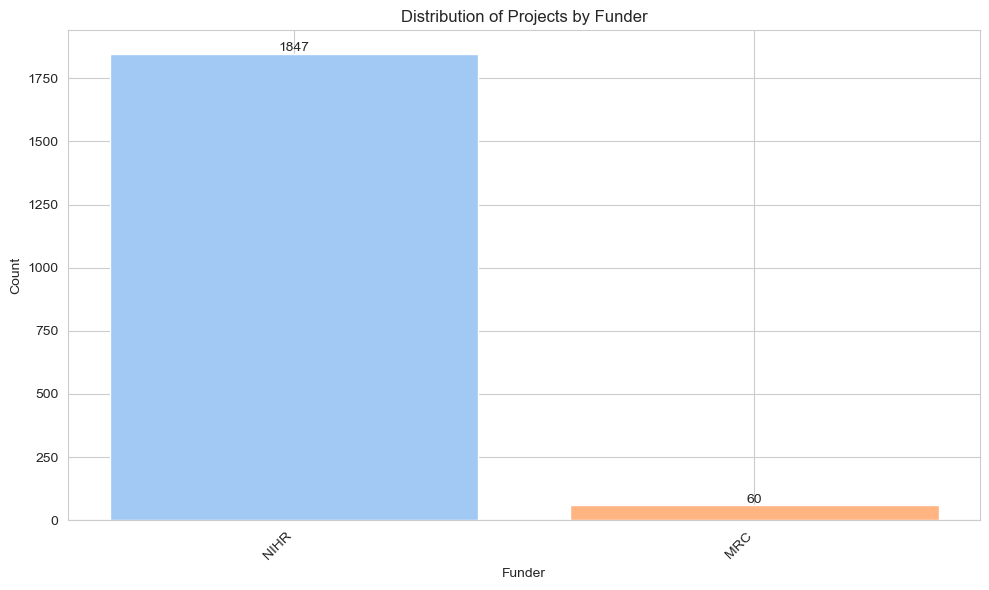

In [56]:

# Set the style
sns.set_style("whitegrid")

# Distribution of projects by Funder
plt.figure(figsize=(10, 6))
funder_counts = df_cleaned['Funder'].value_counts()
colors = sns.color_palette("pastel")[0:len(funder_counts)]
plt.bar(funder_counts.index, funder_counts.values, color=colors)

# Add count numbers on top of each bar
for i, count in enumerate(funder_counts.values):
    plt.text(i, count + 10, str(count), ha='center')

plt.xlabel('Funder')
plt.ylabel('Count')
plt.title('Distribution of Projects by Funder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

1.2 Research Type Analysis:



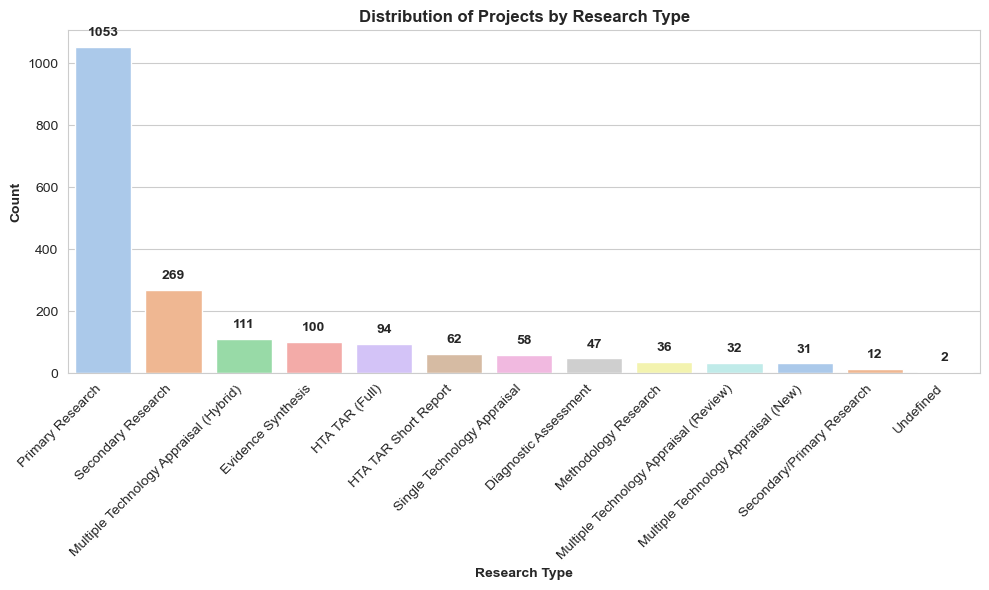

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of projects by Research Type
plt.figure(figsize=(10, 6))
research_type_counts = df_cleaned['ResearchType'].value_counts()
colors = sns.color_palette("pastel")[0:len(research_type_counts)]
ax = sns.barplot(x=research_type_counts.index, y=research_type_counts.values, palette=colors)

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', weight='bold')

plt.xlabel('Research Type', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Projects by Research Type', weight='bold')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


2. Analysis of Performance and Outcomes:

2.1 Status Analysis:



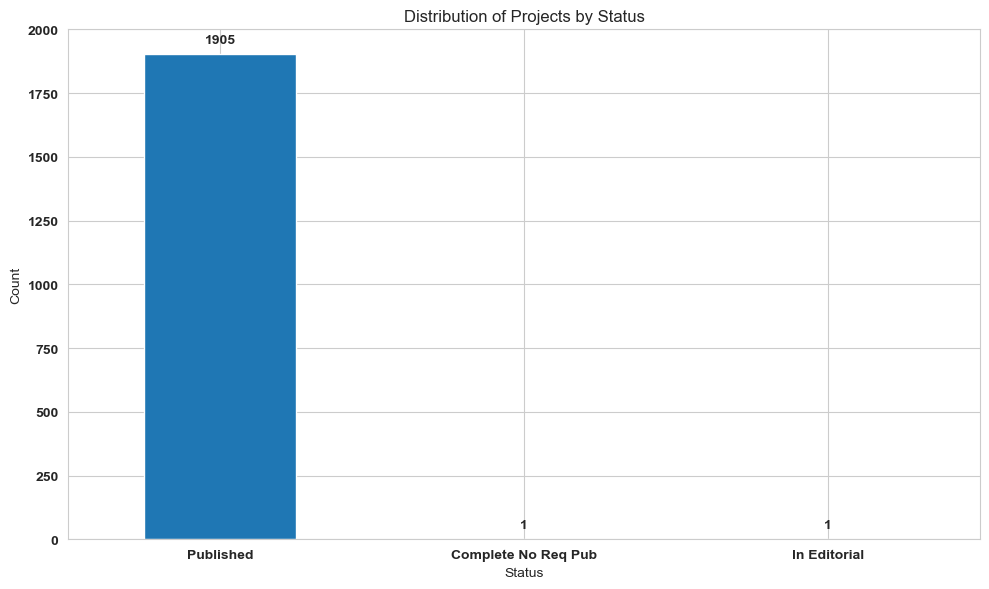

In [83]:
import matplotlib.pyplot as plt

# Distribution of projects by Status
plt.figure(figsize=(10, 6))
status_counts = df_cleaned['Status'].value_counts()
ax = status_counts.plot(kind='bar', xlabel='Status', ylabel='Count', title='Distribution of Projects by Status')

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', weight='bold')

plt.xticks(rotation=0, ha='center', weight='bold')
plt.yticks(weight='bold')

plt.tight_layout()
plt.show()


2.2 Duration and Total Award Cost Analysis:



C:\Users\Divesh\AppData\Local\Temp\ipykernel_18408\3841264029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalAwardCostMillions'] = df_cleaned['CurrentCost'] / 1000000


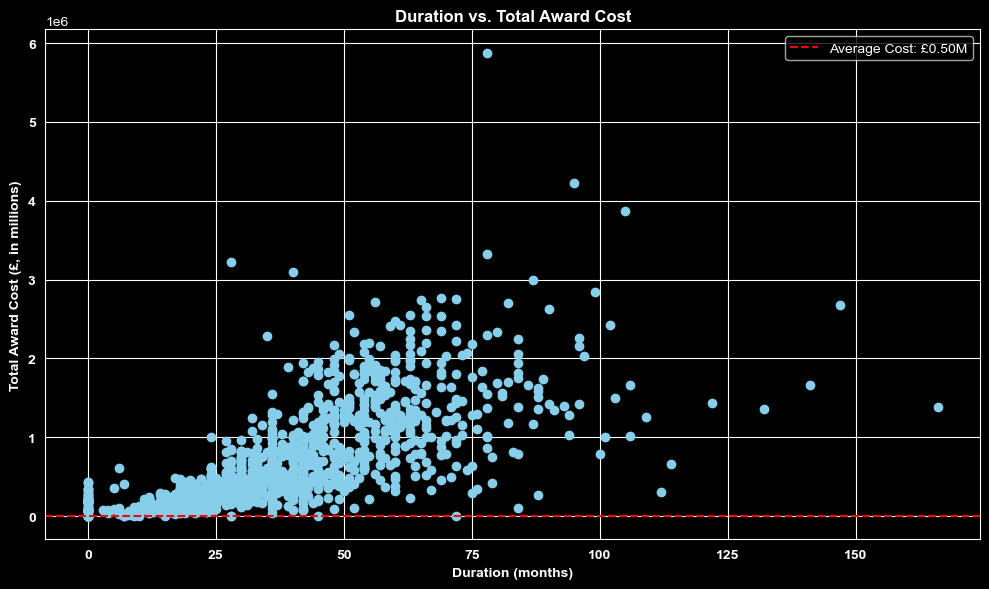

In [103]:
import matplotlib.pyplot as plt

# Scatter plot of Duration vs. Total Award Cost
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['CurrentDuration'], df_cleaned['CurrentCost'], color='skyblue')
plt.xlabel('Duration (months)', weight='bold')
plt.ylabel('Total Award Cost (£, in millions)', weight='bold')
plt.title('Duration vs. Total Award Cost', weight='bold')

# Convert the Total Award Cost to millions
df_cleaned['TotalAwardCostMillions'] = df_cleaned['CurrentCost'] / 1000000

# Calculate average cost
average_cost = df_cleaned['TotalAwardCostMillions'].mean()

# Highlight average cost with a red marker
plt.axhline(average_cost, color='red', linestyle='--', label=f'Average Cost: £{average_cost:.2f}M')

# Set fontweight to bold for tick labels
plt.xticks(weight='bold')
plt.yticks(weight='bold')

plt.legend()

plt.tight_layout()
plt.show()


2.3 Publication Date Analysis:



C:\Users\Divesh\AppData\Local\Temp\ipykernel_18408\1694371904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PublicationYear'] = df_cleaned['PublicationDate'].dt.year


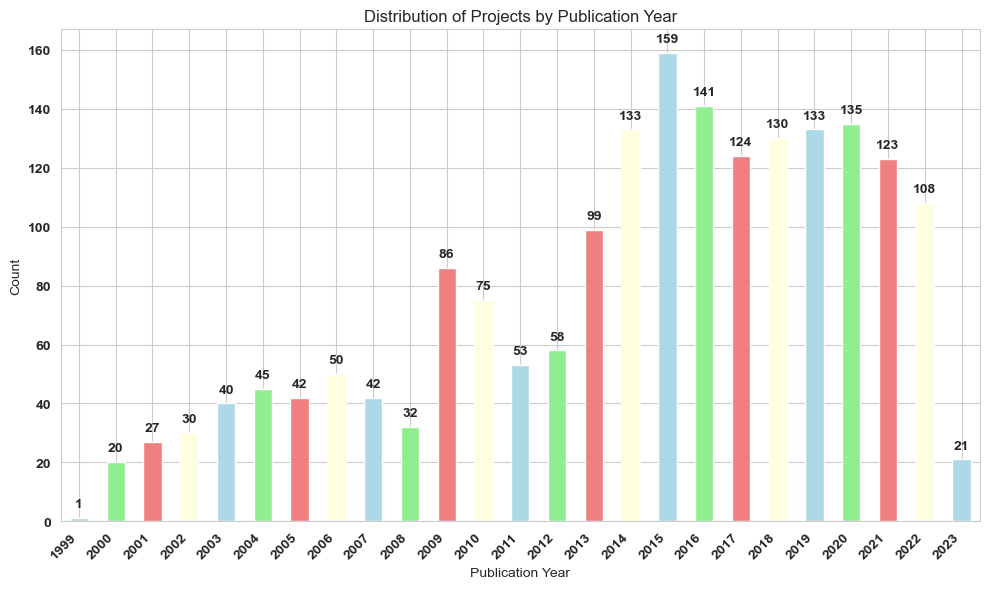

In [69]:
import matplotlib.pyplot as plt

# Distribution of projects by Publication Year
df_cleaned['PublicationYear'] = df_cleaned['PublicationDate'].dt.year
publication_year_counts = df_cleaned['PublicationYear'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']  # Define custom colors
ax = publication_year_counts.plot(kind='bar', xlabel='Publication Year', ylabel='Count', title='Distribution of Projects by Publication Year', color=colors)

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.xticks(rotation=45, ha='right', weight='bold')
plt.yticks(weight='bold')

plt.tight_layout()
plt.show()


3 Analysis of Characteristics and Relationships:


3.1 Investigator Analysis:



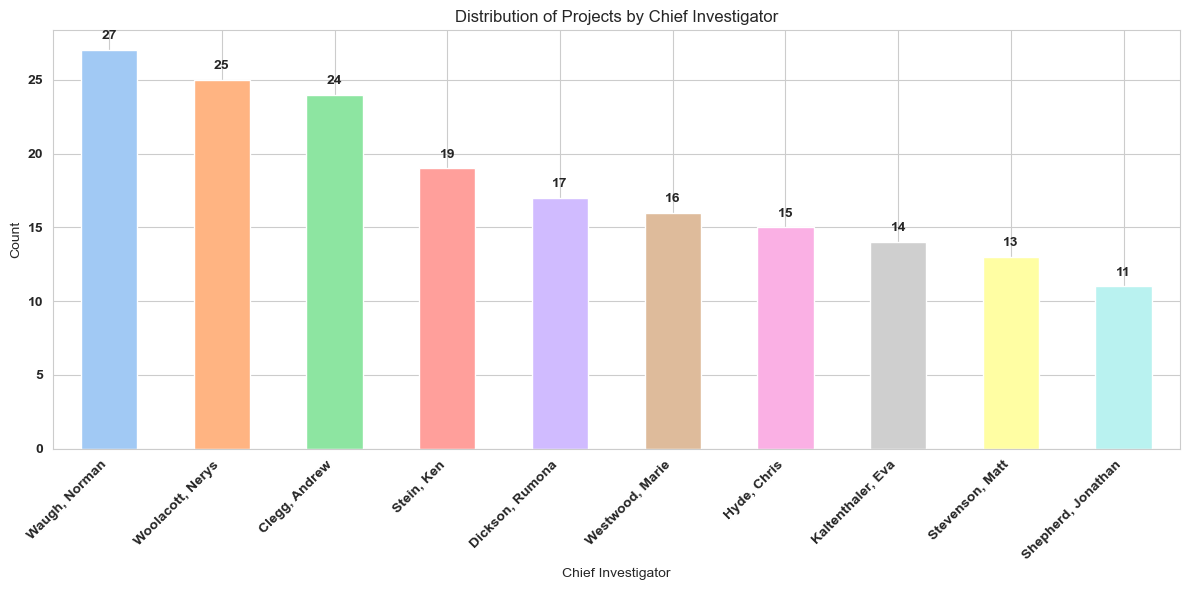

In [71]:

# Distribution of projects by Chief Investigator
plt.figure(figsize=(12, 6))
investigator_counts = df_cleaned['Chief Investigator'].value_counts().head(10)
colors = sns.color_palette('pastel', len(investigator_counts))
ax = investigator_counts.plot(kind='bar', xlabel='Chief Investigator', ylabel='Count', title='Distribution of Projects by Chief Investigator', color=colors)

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.xticks(rotation=45, ha='right', weight='bold')
plt.yticks(weight='bold')

plt.tight_layout()
plt.show()


3.2 Contractor Postcode Analysis:



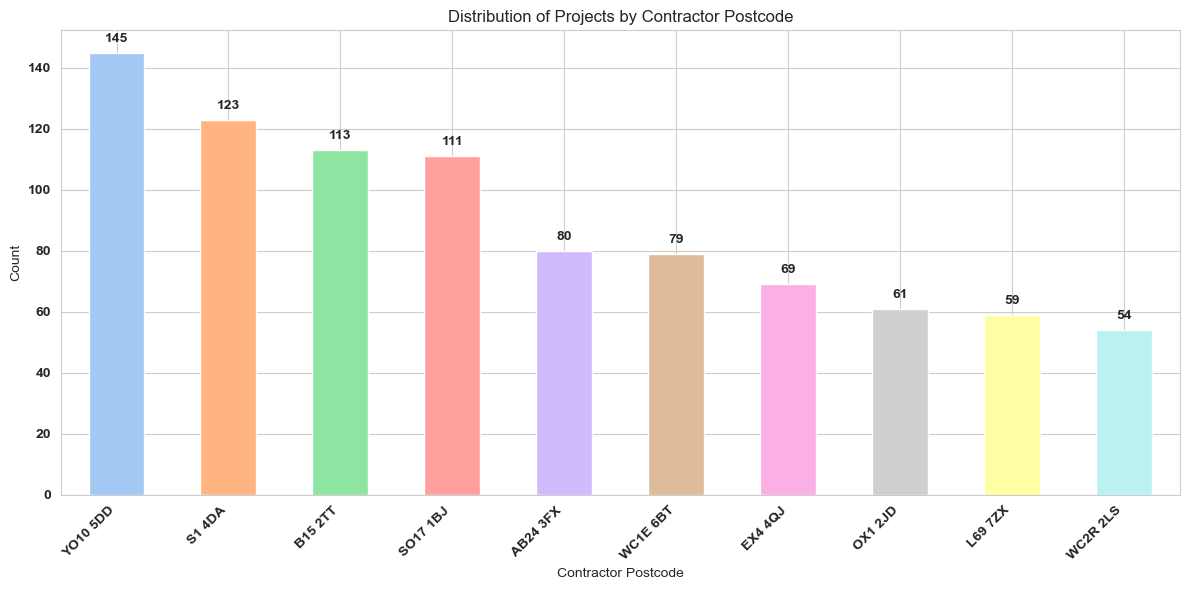

In [72]:
import matplotlib.pyplot as plt

# Distribution of projects by Contractor Postcode
plt.figure(figsize=(12, 6))
postcode_counts = df_cleaned['ContractorPostcode'].value_counts().head(10)
colors = sns.color_palette('pastel', len(postcode_counts))
ax = postcode_counts.plot(kind='bar', xlabel='Contractor Postcode', ylabel='Count', title='Distribution of Projects by Contractor Postcode', color=colors)

# Display count on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', weight='bold')

plt.xticks(rotation=45, ha='right', weight='bold')
plt.yticks(weight='bold')

plt.tight_layout()
plt.show()


3.3 Project Title Analysis:



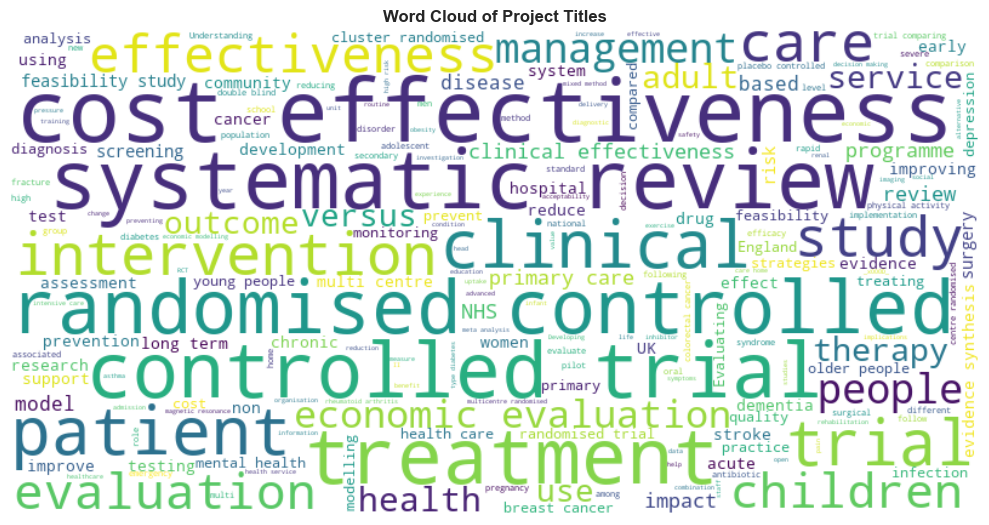

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word cloud of project titles
plt.figure(figsize=(10, 6))
project_titles = ' '.join(df_cleaned['Project Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(project_titles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Project Titles', weight='bold')

plt.tight_layout()
plt.show()
